<a href="https://colab.research.google.com/github/SaraEsamMohamed/Data_Analysis/blob/main/Investigate_a_Dataset_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Project: TMDb movie data



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb).
the datasets contains number of Rows = 10866 & Number of columns = 21 <br> <br>
 in the report i explore the flowing questions :

> <p> 1-what is the runtime the more popular movies take? <br>
 2- Which movies are the most high profitable in the market?<br>
 3-in Which years do movies made the high profits?<br>
 4-which movie with the highest & lowest Budget?<br>
 5-which movie with the highest & lowest Budget?<br>
 6-How does revenue change according to their budget?<br>
 7-what is the time most movies takes? </p>



In [ ]:
# import statements for all of the packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section i will load and acess the dataset

### General Properties

# Gather & Acess Dataset

In [ ]:
df =pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [ ]:
df.describe()  

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
df.shape

(10866, 21)

# Data Cleaning
>In this section i will do this things:  <br><br>
1- check & remove duplicate rows from the dataset <br>
2-remove unnecessary columns and not be used in analysis <br>
3- remove null values  <br>
4-rename two columns (budget_adj ,revenue_adj) to be easy to read <br>
5-Changing format of  release_year into datetime format <br>


In [ ]:
#check for any duplicates row

df.duplicated().sum()

0

In [ ]:
#remove duplicated row and then show after remove

df.drop_duplicates(inplace = True)
df.shape

(9772, 14)

In [ ]:
# remove unnecessary columns and not be used
df.drop(['imdb_id','homepage','budget','revenue','tagline','overview','release_date','keywords'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
#remove rows with null values
df.dropna(inplace = True)
df.shape

(9772, 14)

In [ ]:
#check null values
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
#rename columns to be easy to read
df.rename(columns = {'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace=True)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget                  10865 non-null float64
revenue                 10865 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08


In [ ]:
# convert from int to datetime
df['release_year'] = pd.to_datetime(df['release_year'])

## Exploratory Data Analysis
> I will explore the data to answer the below question in some different visualizations shape

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0911140438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0910f18e10>]], dtype=object)

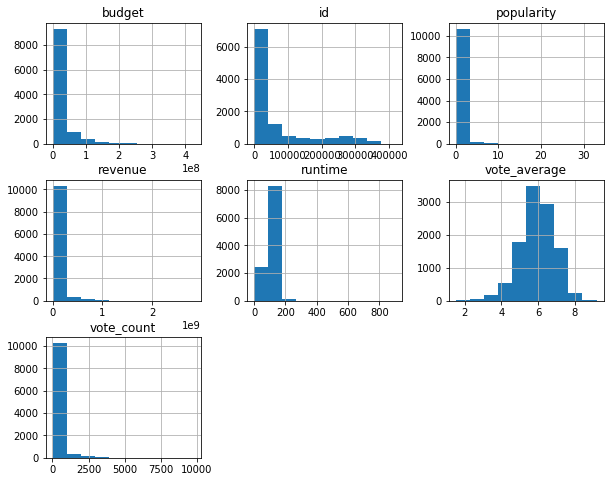

In [ ]:
df.hist(figsize=(10,8))

## Q1 : what is the runtime the more popular movies take?

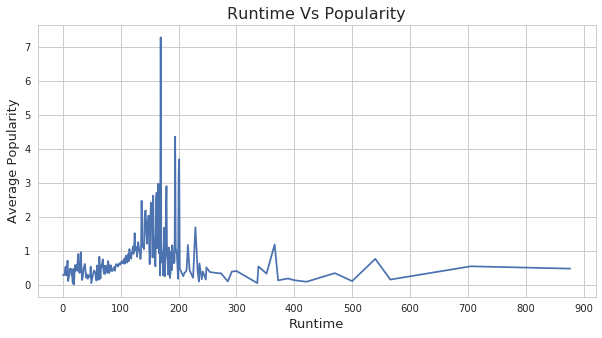

In [ ]:
#using group by function to make the group of the data according to their runtime & find the mean popularity
df.groupby('runtime')['popularity'].mean().plot(figsize = (10,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 16)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

###  from the plot we can infer that movies in the range of 100-200 runtime most popular and viewers loves to watch it 

# Q2 : Which movies are the most high profitable in the market ?

#### first , i Create new column for the profit

In [ ]:
df['profit'] = df['revenue'] - df['budget']

In [ ]:
df.sort_values(['profit'], ascending = False).head(5)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue,profit
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,1970-01-01 00:00:00.000001977,3.957559e+07,2.789712e+09,2.750137e+09
1386,19995,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,1970-01-01 00:00:00.000002009,2.408869e+08,2.827124e+09,2.586237e+09
5231,597,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1970-01-01 00:00:00.000001997,2.716921e+08,2.506406e+09,2.234714e+09
10594,9552,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1113,7.2,1970-01-01 00:00:00.000001973,3.928928e+07,2.167325e+09,2.128036e+09
9806,578,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1415,7.3,1970-01-01 00:00:00.000001975,2.836275e+07,1.907006e+09,1.878643e+09


#### from this table we can find the top 5 movies and all information about them included the most earned profit

# Q3 : in Which years do movies made the  high profits?

In [ ]:
profit_year = df.groupby('release_year')['profit'].sum()
profit_year.head(5)

release_year
1970-01-01 00:00:00.000001960    9.064920e+08
1970-01-01 00:00:00.000001961    2.127059e+09
1970-01-01 00:00:00.000001962    1.159535e+09
1970-01-01 00:00:00.000001963    8.122237e+08
1970-01-01 00:00:00.000001964    2.119616e+09
Name: profit, dtype: float64

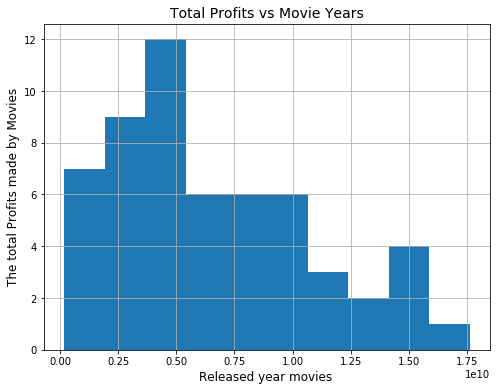

In [ ]:
profit_year.hist(figsize = (8,6))
plt.xlabel('Released year movies ', fontsize = 12)
plt.ylabel('The total Profits made by Movies', fontsize = 12)
plt.title('Total Profits vs Movie Years', fontsize = 14);

In [ ]:
##from this 

# Q4:  Which movie that acheve the highest or lowest Profit?

In [ ]:
df['profit'] = df['revenue'] - df['budget']

In [ ]:
def find_minmax(x):
   
    #use the function 'idmax' to find the index of Highest profit movie.
    max_index = df[x].idxmax()
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    
    high = pd.DataFrame(df.loc[max_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][max_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('profit')

Movie Which Has Highest profit :  Star Wars
Movie Which Has Lowest profit  :  The Warrior's Way


,1329,2244
id,11,46528
popularity,12.0379,0.25054
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
vote_count,4428,74
vote_average,7.9,6.4


# Q5: which movie with the highest & lowest Budget?

In [ ]:
df['budget'] = df['budget'].replace(0,np.NAN)
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
popularity,0.25054,0.177102
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror
production_companies,Boram Entertainment Inc.,Dry County Films|Anchor Bay Entertainment|Movi...
vote_count,74,15
vote_average,6.4,4.1


Text(0.5,0,'Budget')

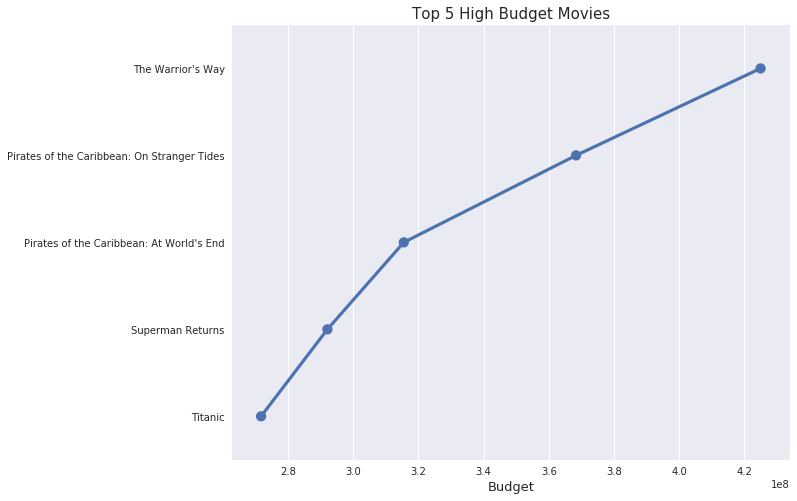

In [ ]:
#make a plot which contain top 5 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:5])
y = list(info['budget'][:5])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,8)})
ax.set_title("Top 5 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)

# Q6: How does revenue change according to their budget?

Correlation Between Revenue And Budget :  0.56798279338


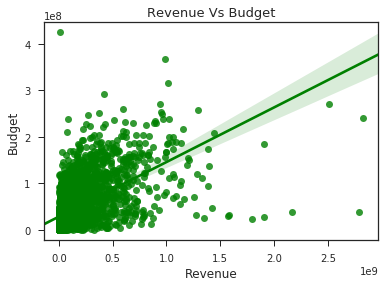

In [ ]:
ax = sns.regplot(x=df['revenue'], y=df['budget'],color='g')

#set the title and labels of the figure
ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("ticks")

#find the correlation between them
#change zero into NAN in budget and revenue column for the exact calculation.
df['budget'] = df['budget'].replace(0,np.NAN)
df['revenue'] = df['revenue'].replace(0,np.NAN)


#find the correlation using 'corr()' function.
#it returns a dataframe which contain the correlation between all the numeric columns.
data_corr = df.corr()
print("Correlation Between Revenue & Budget : ",data_corr.loc['revenue','budget'])

# Q7 :what is the time most movies takes?

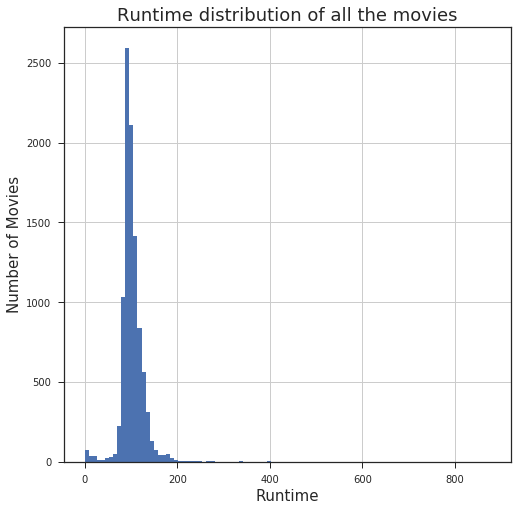

In [ ]:
# a histogram for movie runtimes.

df['runtime'].hist(figsize = (8,8),bins= 100)
plt.xlabel('Runtime', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Runtime distribution of all the movies', fontsize=18);

from histogram we can deduce that most movies are in range (110:170) minutes as showen

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Limitations
 > We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed. <br> <br>
  During the data cleaning process , remove Null values from variables of our interest might deform the analysis and this may display unintentional bias towards the relationship being analyzed . 
  
  # Resourses  :
    Github
    Googl
    Geeksforgeeks website
    Pandas documents
    Mode blog

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0